In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Cleaning

In [ ]:
#Remove Duplicate
df.duplicated().sum()

np.int64(1)

In [10]:
df = df.drop_duplicates()

In [14]:
#Clean Column Names
df.columns = df.columns.str.strip().str.lower()

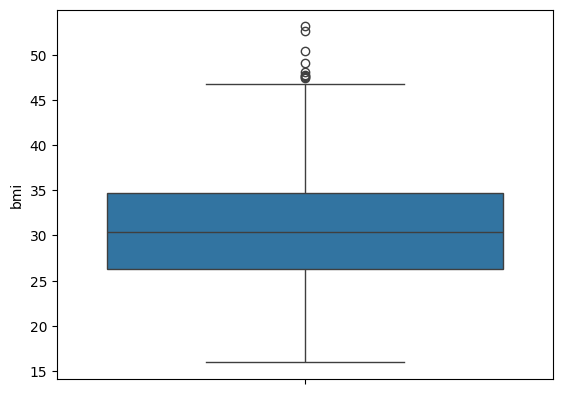

In [15]:
# Check Outliers(BMI)
sns.boxplot(df['bmi'])
plt.show()

Data Filtering

In [16]:
# Smokers Data 
smokers = df[df['smoker'] == 'yes']
smokers.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [17]:
# Age Greater then 30
age_30 = df[df['age'] > 30]
age_30.head()

,age,gender,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [19]:
print(df.columns)

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [20]:
df.columns = df.columns.str.strip().str.lower()

In [21]:
# Female Smokers
female_smokers = df[
    (df['gender'] == 'female') & 
    (df['smoker'] == 'yes')
]

female_smokers.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
23,34,female,31.92,1,yes,northeast,37701.8768
58,53,female,22.88,1,yes,southeast,23244.7902
64,20,female,22.42,0,yes,northwest,14711.7438


Data Analysis(Groupby)

In [22]:
# Average Charges by smokers 
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [23]:
# Average charges by Gender
df.groupby('gender')['charges'].mean()

gender
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [24]:
# Charges by Children
df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

Data Visualization

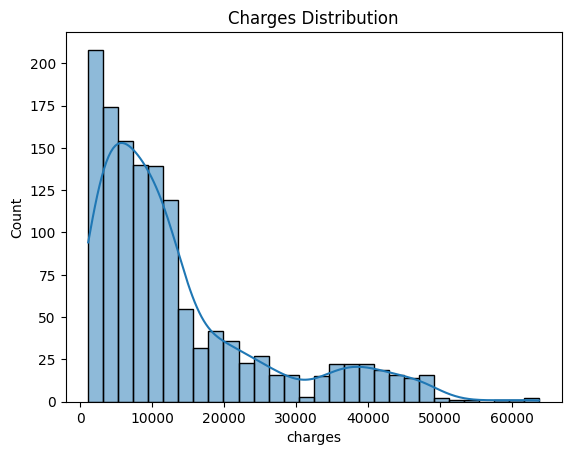

In [25]:
# Charges Distribution
sns.histplot(df['charges'], kde=True)
plt.title("Charges Distribution")
plt.show()

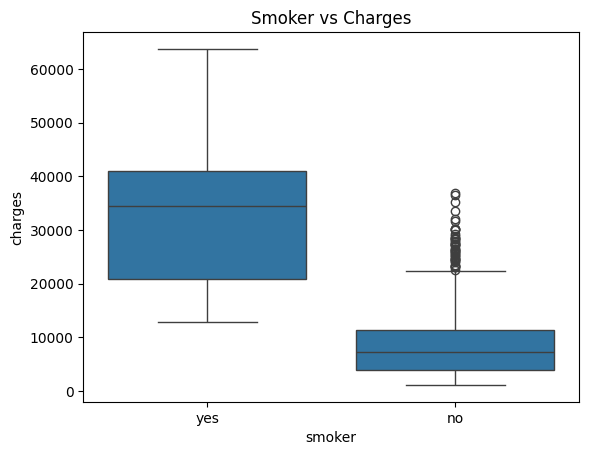

In [26]:
# Smoker vs Charges 
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoker vs Charges")
plt.show()

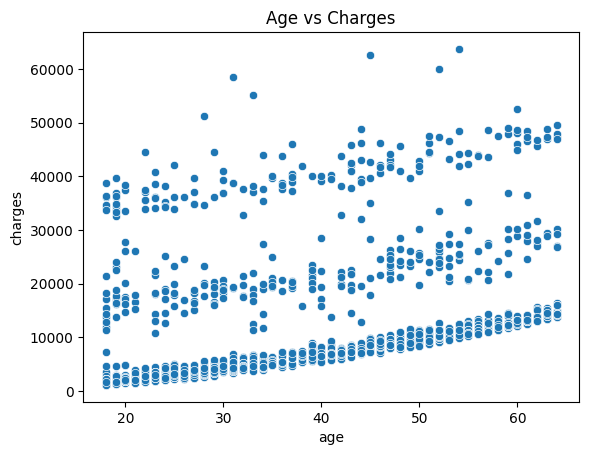

In [27]:
# Age VS Charges
sns.scatterplot(x='age', y='charges', data=df)
plt.title("Age vs Charges")
plt.show()

Saved Cleaned Data

In [28]:
df.to_csv("clean_insurance_data.csv", index=False)